<a href="https://colab.research.google.com/github/KartikM0330/KartikM0330/blob/main/BusinessAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Data

In [ ]:
pip install statsmodels --upgrade

In [ ]:
pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import math

In [ ]:
def generate_data(desired_mean,desired_std_dev):
  num_samples = 156
  samples = np.random.normal(loc=desired_mean, scale=desired_std_dev, size=num_samples)

  actual_mean = np.mean(samples)
  actual_std = np.std(samples)
  zero_mean_samples = samples - (actual_mean)

  zero_mean_mean = np.mean(zero_mean_samples)
  zero_mean_std = np.std(zero_mean_samples)

  scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
  scaled_mean = np.mean(scaled_samples)
  scaled_std = np.std(scaled_samples)

  final_samples = scaled_samples + desired_mean
  final_mean = np.mean(final_samples)
  final_std = np.std(final_samples)

  return final_samples

In [ ]:
sales = generate_data(42.89, 14.61)
visits = generate_data(20.09,12.64)
households = generate_data(19.72,12.33)
price = generate_data(3.2, 1.5)
discount = generate_data(0.22,0.416)
avg_temp = generate_data(490.8,89.39)
max_temp = generate_data(556.7,87.30)
min_temp = generate_data(424.9,93.73)
precipitation = generate_data(0.756,1.33)
eco_index =  generate_data(1.183,5.4)
oil_price = generate_data(2.896,0.53)

In [ ]:
column_values = ['sales','price','discount','visits','households','avg_temp','max_temp','min_temp','precipitation','eco_index','oil_price']

In [ ]:
data = np.column_stack((sales,price,discount,visits,households,avg_temp,max_temp,min_temp,precipitation,eco_index,oil_price))

In [ ]:
df = pd.DataFrame(data = data, columns = column_values)

In [ ]:
df.head()

,sales,price,discount,visits,households,avg_temp,max_temp,min_temp,precipitation,eco_index,oil_price
0,31.290381,3.698196,0.376167,32.877810,35.131583,467.057936,396.799454,265.140879,1.006842,-4.623676,3.116639
1,31.218834,3.293287,-0.038368,29.184546,15.456885,499.426483,647.953276,333.940018,1.485414,5.327224,1.939368
2,43.535013,3.061439,0.150960,36.275271,27.926937,411.413302,571.391286,354.624274,0.269376,0.154045,2.405483
3,52.782984,2.790668,-0.240317,20.807179,31.847968,661.329716,430.403079,398.924127,-0.806859,-0.139051,2.661227
4,29.806685,4.622580,-0.395553,8.909365,31.629659,603.444823,473.932225,473.208459,2.045073,-6.555098,3.738934


In [ ]:
df

,sales,price,discount,visits,households,avg_temp,max_temp,min_temp,precipitation,eco_index,oil_price
0,31.290381,3.698196,0.376167,32.877810,35.131583,467.057936,396.799454,265.140879,1.006842,-4.623676,3.116639
1,31.218834,3.293287,-0.038368,29.184546,15.456885,499.426483,647.953276,333.940018,1.485414,5.327224,1.939368
2,43.535013,3.061439,0.150960,36.275271,27.926937,411.413302,571.391286,354.624274,0.269376,0.154045,2.405483
3,52.782984,2.790668,-0.240317,20.807179,31.847968,661.329716,430.403079,398.924127,-0.806859,-0.139051,2.661227
4,29.806685,4.622580,-0.395553,8.909365,31.629659,603.444823,473.932225,473.208459,2.045073,-6.555098,3.738934
...,...,...,...,...,...,...,...,...,...,...,...
151,41.008593,2.857320,-0.018739,32.431738,9.873897,522.382639,508.813839,553.264265,0.913068,11.321718,3.381665
152,41.766279,4.476717,0.024785,40.849959,9.494886,391.394533,466.046964,381.440156,1.593006,-3.870688,2.938434
153,37.694025,2.094760,0.532553,6.659009,2.089353,527.514413,571.371826,477.932291,1.897847,-2.022110,2.900825
154,51.386237,3.934556,0.387644,15.705885,33.830919,541.388535,449.400664,275.852811,3.305649,-3.818430,3.111997


Time Series

In [ ]:
"""Storing sales data which are basically the past values which we will use for the prediction"""

sales_data = df['sales']

"""Printing the shape, actual data set and past sales_data after extracting"""

print('Shape of data \t', df.shape)
print('\nOriginal data set \n\n', df.head())
print('After extracting sales data: \n', sales_data)

Shape of data 	 (156, 11)

Original data set 

        sales     price  discount  ...  precipitation  eco_index  oil_price
0  31.290381  3.698196  0.376167  ...       1.006842  -4.623676   3.116639
1  31.218834  3.293287 -0.038368  ...       1.485414   5.327224   1.939368
2  43.535013  3.061439  0.150960  ...       0.269376   0.154045   2.405483
3  52.782984  2.790668 -0.240317  ...      -0.806859  -0.139051   2.661227
4  29.806685  4.622580 -0.395553  ...       2.045073  -6.555098   3.738934

[5 rows x 11 columns]
After extracting sales data: 
 0      31.290381
1      31.218834
2      43.535013
3      52.782984
4      29.806685
         ...    
151    41.008593
152    41.766279
153    37.694025
154    51.386237
155    41.367251
Name: sales, Length: 156, dtype: float64


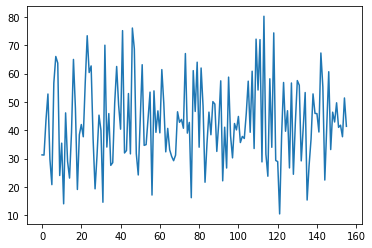

In [ ]:
"""sales_data[:50].plot()"""
sales_data.plot()

Check for Stationarity
(Mean and Variance should not fluctuate much and also to check the Seasonality i.e no repeating patterns)

In [ ]:
from statsmodels.tsa.stattools import adfuller

"""Augmented Dickey-Fuller Test for Stationarity test"""
result = adfuller(sales_data, autolag='AIC')

print("1. ADF :", result[0])

"""P-value determines if Stationarity is existing or not, if >0.5 then not stationarity 
   and if <0.5 then only stationarity"""
print("2. P-value :",result[1])

print("3. Num of Lags :", result[2])
print("3. Num of Observations used for ADF Regression and Critical Values Calculations :", result[3])
print("Critical values :")
for key, val in result[4].items():
  print("\t", key, ": ", val)

1. ADF : -5.108699616210177
2. P-value : 1.3465174243272831e-05
3. Num of Lags : 12
3. Num of Observations used for ADF Regression and Critical Values Calculations : 143
Critical values :
	 1% :  -3.4769274060112707
	 5% :  -2.8819726324025625
	 10% :  -2.577665408088415


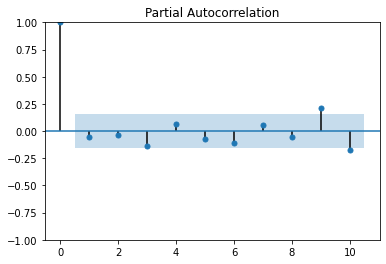

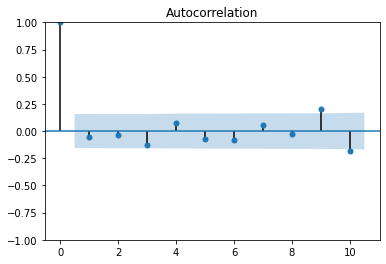

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(sales_data, lags = 10)
acf = plot_acf(sales_data, lags = 10)

In [ ]:
shift1 = sales_data - sales_data.shift(1)

In [ ]:
sales_data = shift1.dropna()
result = adfuller(sales_data)

print("1. ADF :", result[0])

"""P-value determines if Stationarity is existing or not, if >0.05 then not stationarity 
   and if <0.05 then only stationarity"""
print("2. P-value :",result[1])

print("3. Num of Lags :", result[2])
print("3. Num of Observations used for ADF Regression and Critical Values Calculations :", result[3])
print("Critical values :")
for key, val in result[4].items():
  print("\t", key, ": ", val)

1. ADF : -5.608983815884331
2. P-value : 1.215708719237428e-06
3. Num of Lags : 14
3. Num of Observations used for ADF Regression and Critical Values Calculations : 140
Critical values :
	 1% :  -3.4779446621720114
	 5% :  -2.8824156122448983
	 10% :  -2.577901887755102


ARMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

"""Train the data"""
arma_model = ARIMA(sales_data,order=(1,0,1)).fit()

In [ ]:
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  155
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -638.301
Date:                Sun, 24 Oct 2021   AIC                           1284.601
Time:                        11:19:57   BIC                           1296.775
Sample:                             0   HQIC                          1289.546
                                - 155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.030      0.400      0.689      -0.047       0.070
ar.L1         -0.0529      0.081     -0.654      0.513      -0.211       0.105
ma.L1         -1.0000     16.575     -0.060      0.9

In [ ]:
"""To compare the prediction, we created a test data before actually predicting"""

test1 = sales_data[0:len(sales_data)-149]

In [ ]:
arma_pred = arma_model.predict(start=0,end=len(sales_data)-150,dynamic = False)

1     0.011926
2     0.055870
3    -8.670695
4   -13.800090
5     8.530905
6    15.078286
Name: predicted_mean, dtype: float64


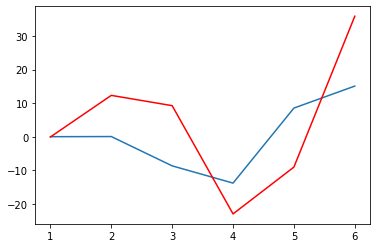

In [ ]:
from matplotlib import pyplot
pyplot.plot(arma_pred)
pyplot.plot(test1, color='red')
print(arma_pred)

Prediction Error in ARMA

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse1 = sqrt(mean_squared_error(test1, arma_pred))

print(rmse1)

14.69958993098825


ARIMA

In [ ]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Determining order for ARIMA

In [ ]:
stepwise_fit = auto_arima(sales_data, trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1392.053, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1347.346, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1390.055, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1337.046, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1317.473, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1315.377, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1315.125, Time=0.23 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1313.139, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1313.386, Time=0.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 s

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(sales_data,order=(5,0,0)).fit()

In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  155
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -636.571
Date:                Sun, 24 Oct 2021   AIC                           1287.143
Time:                        11:20:01   BIC                           1308.447
Sample:                             0   HQIC                          1295.796
                                - 155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0113      0.028      0.408      0.683      -0.043       0.065
ar.L1         -0.0521      0.080     -0.648      0.517      -0.210       0.105
ar.L2         -0.0398      0.083     -0.481      0.6

In [ ]:
"""To compare the prediction, we created a test data before actually predicting"""

test2 = sales_data[0:len(sales_data)-149]

1     0.044885
2     0.104285
3    -7.925418
4   -13.126474
5     7.332610
6    14.370278
Name: predicted_mean, dtype: float64


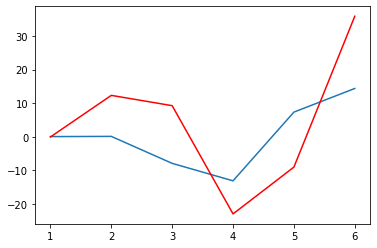

In [ ]:
arima_pred = arima_model.predict(start=0,end=len(sales_data)-150,type='levels')

from matplotlib import pyplot
pyplot.plot(arima_pred)
pyplot.plot(test2, color='red')
print(arima_pred)

Prediction of error ARIMA

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse2 = sqrt(mean_squared_error(test2, arima_pred))

print(rmse2)

14.532135896298632


SARIMA

In [ ]:
"""SARIMA"""
import statsmodels.api as sm  
model2=sm.tsa.statespace.SARIMAX(sales_data,order=(2,1,2),seasonal_order=(2,1,2,6))
sarima_model = model2.fit()

In [ ]:
print(sarima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                  155
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -654.020
Date:                           Sun, 24 Oct 2021   AIC                           1326.039
Time:                                   11:20:03   BIC                           1353.014
Sample:                                        0   HQIC                          1336.999
                                           - 155                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4478      0.210     -6.892      0.000      -1.860      -1.036
ar.L2         -0.4570      0.142     -3.218

In [ ]:
sarima_pred = sarima_model.predict(start=46,end=60,dynamic=True)
print(sarima_pred)

47   -17.859525
48     9.660163
49    -4.639372
50    14.101116
51   -14.170641
52    12.129739
53    -4.340350
54     2.475417
55     3.919863
56     7.295586
57   -10.908118
58     9.477631
59     3.483877
60    -4.764550
61     1.061326
Name: predicted_mean, dtype: float64


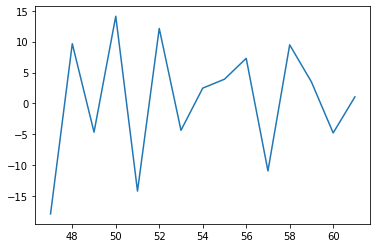

In [ ]:
sarima_pred.plot()

In [ ]:
"""SNF"""
def seasonal_naive_forecast(series, seasonal_period, forecast_horizon):

     if len(series) < seasonal_period:
         raise Error("There must be at least 'seasonal_period' observations")

     # We assume 'series' to be a pandas.Series object
     prev_season = series.iloc[-seasonal_period:]

     season_number = int(np.ceil(forecast_horizon/seasonal_period))

     next_seasons = np.tile(prev_season, season_number)

     # We were only asked to predict the next 'forecast_horizon' values
     return pd.Series(next_seasons[:forecast_horizon])

In [ ]:
snf_result = seasonal_naive_forecast(sales_data,52,65)

In [ ]:
snf_result[46:61]

46     6.784050
47    -8.673895
48     0.757686
49    -4.072254
50    13.692212
51   -10.018985
52     8.773813
53    11.460856
54   -18.050279
55    21.560295
56   -27.296169
57    38.626847
58   -17.968368
59    17.794203
60   -43.183812
dtype: float64

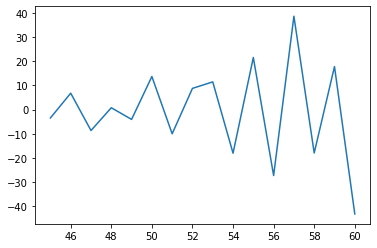

In [ ]:
s = snf_result[45:61]
s.plot()

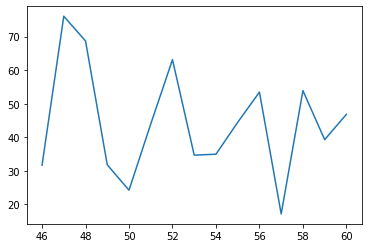

In [ ]:
a=sales[45:60]
b=[46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
import matplotlib.pyplot as plt
plt.plot(b,a)

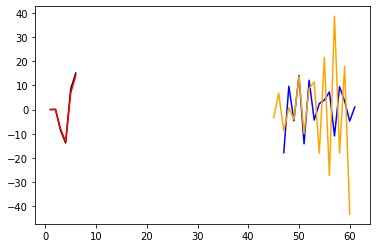

In [ ]:
from matplotlib import pyplot
pyplot.plot(arma_pred, color='black')
pyplot.plot(arima_pred, color='red')
pyplot.plot(sarima_pred, color='blue')
pyplot.plot(s, color='orange') #SNF

##arima_pred.plot() #Orange
#sarima_pred.plot()  #Green
#plt.plot(b,a) #Red (Sales data)
#s.plot()  #Violet (SNF)

Machine Learning Model

In [ ]:
"""Ramdom Forest"""
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
print(x)
print(x.shape)

        price  discount     visits  ...  precipitation  eco_index  oil_price
0    3.698196  0.376167  32.877810  ...       1.006842  -4.623676   3.116639
1    3.293287 -0.038368  29.184546  ...       1.485414   5.327224   1.939368
2    3.061439  0.150960  36.275271  ...       0.269376   0.154045   2.405483
3    2.790668 -0.240317  20.807179  ...      -0.806859  -0.139051   2.661227
4    4.622580 -0.395553   8.909365  ...       2.045073  -6.555098   3.738934
..        ...       ...        ...  ...            ...        ...        ...
151  2.857320 -0.018739  32.431738  ...       0.913068  11.321718   3.381665
152  4.476717  0.024785  40.849959  ...       1.593006  -3.870688   2.938434
153  2.094760  0.532553   6.659009  ...       1.897847  -2.022110   2.900825
154  3.934556  0.387644  15.705885  ...       3.305649  -3.818430   3.111997
155  2.291726  0.659797  26.448967  ...       2.061417  -2.535786   3.399452

[156 rows x 10 columns]
(156, 10)


In [ ]:
print(y)
print(y.shape)

0      31.290381
1      31.218834
2      43.535013
3      52.782984
4      29.806685
         ...    
151    41.008593
152    41.766279
153    37.694025
154    51.386237
155    41.367251
Name: sales, Length: 156, dtype: float64
(156,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_transformed = scaler.fit_transform(x)

In [ ]:
print(x_transformed)

[[0.52749639 0.49508109 0.52950463 ... 0.58989642 0.20331814 0.61854625]
 [0.48042678 0.31530189 0.47968225 ... 0.65260025 0.56113488 0.20423156]
 [0.45347499 0.39741129 0.5753366  ... 0.49327158 0.37511652 0.3682705 ]
 ...
 [0.34110117 0.56290403 0.17581125 ... 0.70663835 0.29686585 0.54259518]
 [0.55497253 0.50005845 0.29785421 ... 0.8910926  0.23227333 0.61691261]
 [0.36399798 0.61808794 0.4427791  ... 0.72806976 0.27839494 0.71807598]]


In [ ]:
model5.fit(x_transformed,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
x_transformed[45,:]

array([0.33790411, 0.5004486 , 0.40016299, 0.56782389, 0.38505786,
       0.03061818, 0.59922511, 0.63367603, 0.51204996, 0.58022491])

In [ ]:
y[45]

31.638976804138963

In [ ]:
model5.predict([[0.66840646, 0.45086737, 0.6875    , 0.37878788, 0.22043896,
       0.24332287, 0.27099355, 0.60846076, 0.66549433, 0.5275641 ]])

array([46.32748807])

In [ ]:
import math
MSE = np.square(np.subtract(y,model5.predict(x))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

15.070196397283983


Deep Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_transformed,y,test_size = 0.15)

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(132, 10)
(24, 10)


In [ ]:
print(ytrain.shape)
print(ytest.shape)

(132,)
(24,)


In [ ]:
import tensorflow.keras as tf

In [ ]:
model6 = tf.models.Sequential()
model6.add(tf.layers.Dense(16,input_shape = (10,)))
model6.add(tf.layers.Dense(8))
model6.add(tf.layers.Dense(1,activation='linear'))
model6.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 16)                176       
_________________________________________________________________
dense_118 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 9         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [ ]:
history = model6.fit(xtrain,ytrain,epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 2090.3740 - mse: 2090.3740 - mae: 43.3672
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 2069.1880 - mse: 2069.1880 - mae: 43.1258
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 2048.4485 - mse: 2048.4485 - mae: 42.8819
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 2027.6387 - mse: 2027.6387 - mae: 42.6343
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 2005.3851 - mse: 2005.3851 - mae: 42.3784
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1982.7832 - mse: 1982.7832 - mae: 42.1119
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 1959.3345 - mse: 1959.3345 - mae: 41.8262
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 1933.0297 - mse: 1933.0297 - mae: 41.5179
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1906.5503 - mse: 1906.550

In [ ]:
mse = history.history['mse']

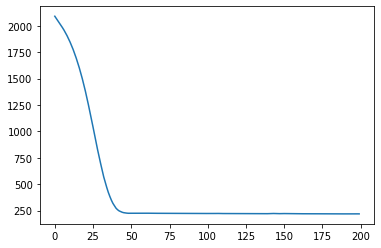

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mse)

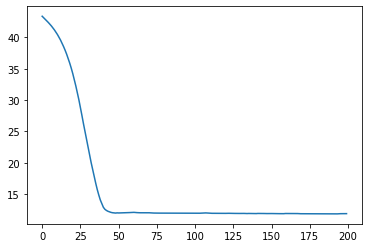

In [ ]:
mae = history.history['mae']
plt.plot(mae)

In [ ]:
model6.evaluate(xtest,ytest)

1/1 [==============================] - 0s 94ms/step - loss: 229.7068 - mse: 229.7068 - mae: 13.1811


[229.7068328857422, 229.7068328857422, 13.181129455566406]